In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import namedtuple
from random import sample, seed
from sklearn import metrics
from itertools import product
from collections import namedtuple, defaultdict
from distutils.version import LooseVersion
#cluster_count = pd.read_csv("count_clusters.csv",header=0)

In [34]:
def string_to_int(s):
    """Create a unique integer from a string
    """
    ord3 = lambda x : '%.3d' % ord(x)
    return int(''.join(map(ord3, s)))

def all_dict():

    datasets = ["Strain","Species"]
    thresholds = list(map(str,matplotlib.cbook.flatten([1, range(500,10001,500)])))
    covariances = ["spherical","diag","tied","full"]
    pcas = list(map(str,range(70,101,1)))
    samples = [list(map(str,range(2,65,2))),list(map(str,range(2,97,2)))]
    final = ["Fixed","Guess"]
    dirichlet = ["0.01", "0.1", "1", "10", "100"]
    experiments = ["PCA","Covariance","Threshold","Samples","Final","Fcomp", "Dirichlet", "Dcomp"]
    repeats = list(map(str,range(5)))
    
    thr = list(product(datasets,product(thresholds,repeats)))
    cov = list(product(datasets,product(covariances,repeats)))
    pca = list(product(datasets,product(pcas,repeats)))
    sam_1 = list(product([datasets[0]],product(samples[0],repeats)))
    sam_2 = list(product([datasets[1]],product(samples[1],repeats)))
    sam = sam_1 + sam_2
    fin = list(product(datasets,product(final,repeats)))
    dpfin = list(product(datasets,product(dirichlet,repeats[:1])))

    t = list(product(["Threshold"],thr))
    c = list(product(["Covariance"],cov))
    p = list(product(["Pca"],pca))
    s = list(product(["Samples"],sam_1+sam_2))
    f = list(product(["Final"],fin))
    f2 = list(product(["Fcomp"],fin))
    d = list(product(["Dirichlet"],dpfin))
    d2 = list(product(["Dcomp"],dpfin))
    all_dirs = c+t+p+s+f+f2+d+d2

    exd = defaultdict(lambda : defaultdict(lambda : defaultdict(list)))
    for exp,(ds,(ty,rep)) in all_dirs:
        # use i as seed for concoct
        hash('asdf') % ((sys.maxsize + 1) * 2)
        i = (hash(string_to_int("{}{}{}{}".format(exp,ds,ty,rep))) % (4294967294)) + 1
        exd[exp][ds][ty].append(i)
    return experiments, datasets, thresholds, covariances, pcas, samples, final, dirichlet, exd


In [35]:
def seaborn_plot(df,col,plot_label):
    sns.axes_style("darkgrid")
    sns.set_context("poster", font_scale=1.2)
    fig_size = 7
    def plot_exp(exp,ylabel,sharey=True, hue=None):
        g = sns.FacetGrid(df, col=col,size=fig_size,
                              legend_out=False, sharex=True, sharey=sharey, 
                              col_order=["Strain","Species"])
        g.map(sns.pointplot, "Type", *exp,
                              order=plot_label.order)
        if sharey:
            g.set(ylim=(0,g.axes.flat[0].get_ylim()[1]))
        g.set_ylabels(ylabel)
        g.set_xticklabels(plot_label.labels)
        g.set_xticklabels(rotation=45)
        for ax,xlabel in zip(g.axes.flat,plot_label.xlabels):
            ax.set_xlabel(xlabel)
        return g

    g1 = plot_exp(["Value","Metric"],"",hue=None)
    g1.set(ylim=(0,1))
    g1.add_legend()

    g2 = plot_exp(["Minutes"],"Execution in minutes",False)

    g3 = plot_exp(["PCA"],"# PCA components")

    g4 = plot_exp(["PassThreshold"],"# Contigs for fitting")
        
    return g1,g2,g3,g4

In [36]:
experiments, datasets, thresholds, covariances, pcas, samples, final, dirichlet, hierarchy_dict = all_dict()

In [37]:
PlotLabel = namedtuple("PlotLabel",["labels","order","xlabels","xlim"])
labels = ([s if (s%10==0 or s in [2,64,96]) else '' for i,s in enumerate(map(int,samples[1]))],
          [s if i%2==0 else '' for i,s in enumerate(thresholds)],
          [s if i%3==0 else '' for i,s in enumerate(pcas)],
          ["Fixed","BIC"],
          ["Fixed","BIC"],
          ["Fixed","BIC"] + list(map(lambda x: "DP_{0}".format(x), dirichlet)))


In [38]:
plot_labels = {"Total_cov" : PlotLabel(labels[5],final + dirichlet,["Model run"]*2,None)}

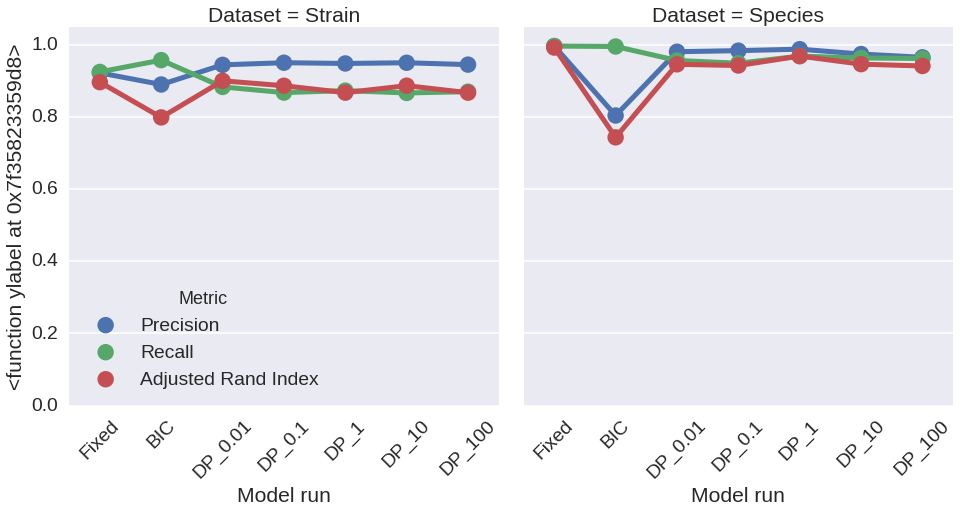

In [57]:
ylable=""
plot_label=plot_labels["Total_cov"]

g = sns.factorplot(x="Type",
                   y="Value",
                   hue="Metric",
                   col="Dataset",
                   data=ad_gr,
                  size=7,
                  legend_out=False,
                  sharex=True,
                  sharey=True,
                  col_order=["Strain","Species"],
                  order=plot_label.order)
g.set(ylim=(0,g.axes.flat[0].get_ylim()[1]))
g.set_ylabels(ylabel)
g.set_xticklabels(plot_label.labels)
g.set_xticklabels(rotation=45)
for ax,xlabel in zip(g.axes.flat,plot_label.xlabels):
    ax.set_xlabel(xlabel)

/home/binni/anaconda3/envs/sci3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


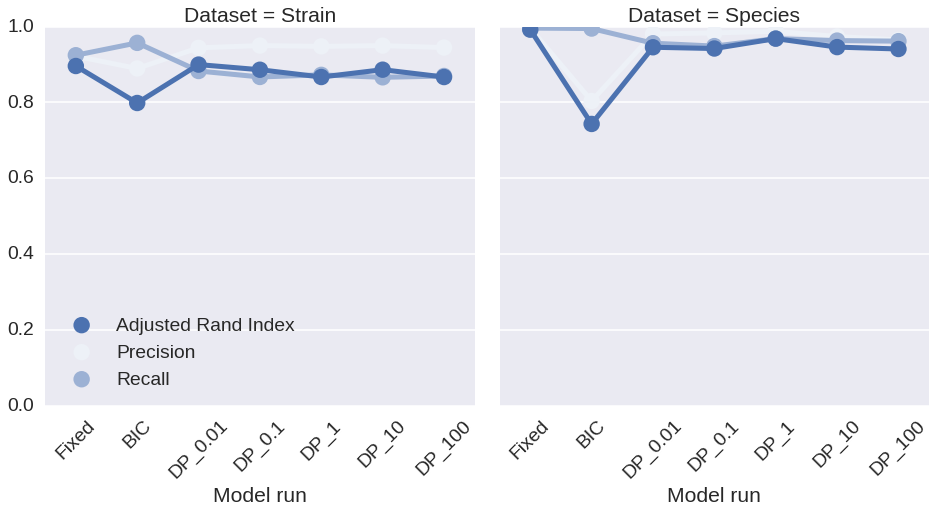

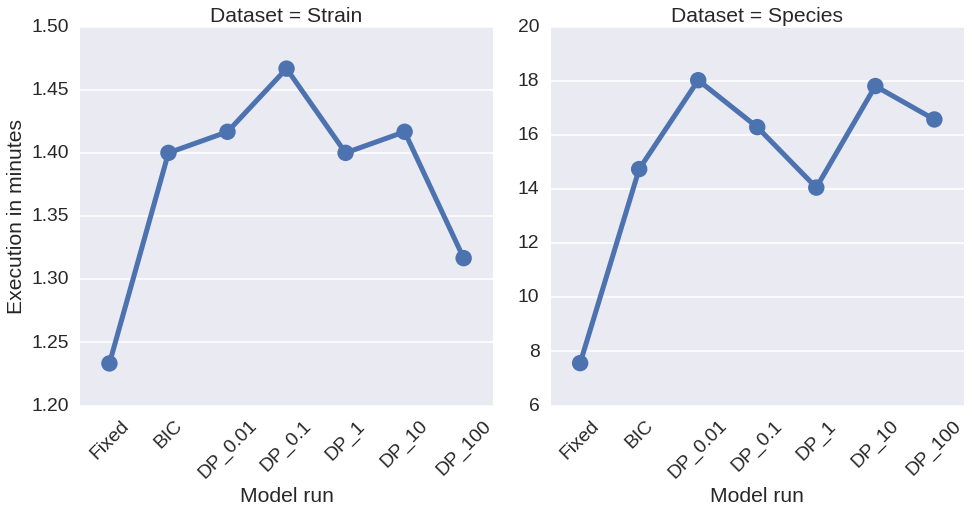

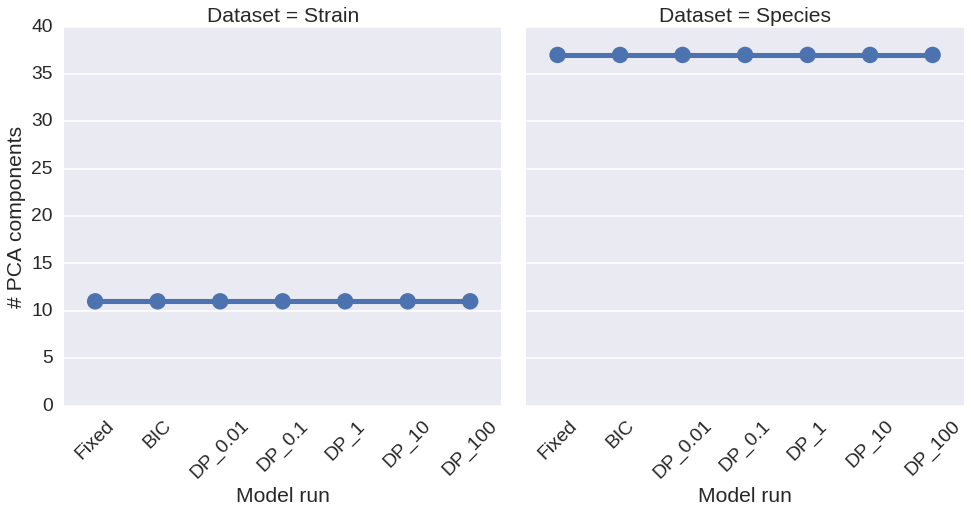

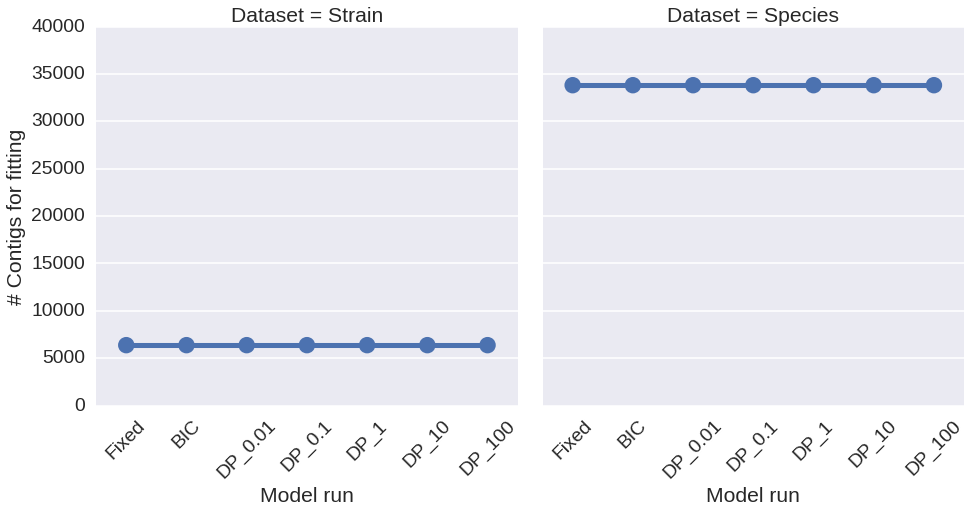

In [40]:
ad = pd.read_csv("all_data_max_ari.csv")
f = ["Final","Dirichlet"]
ad_gr = ad[((ad.Experiment == f[0]) | (ad.Experiment == f[1]))]
ad_gr.Experiment = "Total_cov"
g1,g2,g3,g4 = seaborn_plot(ad_gr,"Dataset",
                 plot_labels.get("Total_cov"))

In [11]:
cluster_count[cluster_count.Experiment == "Final"]

Experiment  Dataset   Type  PCA  PassThreshold
32      Final  Species  Fixed   37          33807
33      Final  Species  Guess   37          33807
34      Final   Strain  Fixed   11           6373
35      Final   Strain  Guess   11           6373

In [5]:
gr = df.groupby(["Experiment","Dataset","Type","Metric"])

In [6]:
met = gr.agg([np.mean,np.std])
met.iloc[-1,-1] = df[(df.Experiment == "Final") & (df.Dataset == "Strain") & (df.Metric == "Recall") & (df.Type == "Guess")].Value.std()
with open ("test.txt","w") as fh:
    fh.write(met.Value.to_latex())
met

Seed            PCA      \
                                                    mean       std mean std   
Experiment Dataset Type  Metric                                               
Final      Species Fixed Adjusted Rand Index  2520437272  1.581139   37   0   
                         Precision            2520437272  1.581139   37   0   
                         Recall               2520437272  1.581139   37   0   
                   Guess Adjusted Rand Index  3340639992  1.581139   37   0   
                         Precision            3340639992  1.581139   37   0   
                         Recall               3340639992  1.581139   37   0   
           Strain  Fixed Adjusted Rand Index  2775947933  1.581139   11   0   
                         Precision            2775947933  1.581139   11   0   
                         Recall               2775947933  1.581139   11   0   
                   Guess Adjusted Rand Index  3596150653  1.581139   11   0   
                         Precision            3596150653  1.581139   11   0   
                         Recall               3596150653  1.581139   11   0   

                                                Minutes            \
                                                   mean       std   
Experiment Dataset Type  Metric                                     
Final      Species Fixed Adjusted Rand Index   8.033333  0.415999   
                         Precision             8.033333  0.415999   
                         Recall                8.033333  0.415999   
                   Guess Adjusted Rand Index  15.230000  1.532898   
                         Precision            15.230000  1.532898   
                         Recall               15.230000  1.532898   
           Strain  Fixed Adjusted Rand Index   1.226666  0.038369   
                         Precision             1.226666  0.038369   
                         Recall                1.226666  0.038369   
                   Guess Adjusted Rand Index   1.420000  0.046248   
                         Precision             1.420000  0.046248   
                         Recall                1.420000  0.046248   

                                             PassThreshold         Value  \
                                                      mean std      mean   
Experiment Dataset Type  Metric                                            
Final      Species Fixed Adjusted Rand Index         33807   0  0.989519   
                         Precision                   33807   0  0.991231   
                         Recall                      33807   0  0.994532   
                   Guess Adjusted Rand Index         33807   0  0.695655   
                         Precision                   33807   0  0.799042   
                         Recall                      33807   0  0.995064   
           Strain  Fixed Adjusted Rand Index          6373   0  0.889556   
                         Precision                    6373   0  0.920760   
                         Recall                       6373   0  0.921814   
                   Guess Adjusted Rand Index          6373   0  0.798199   
                         Precision                    6373   0  0.889340   
                         Recall                       6373   0  0.956856   

                                                        
                                                   std  
Experiment Dataset Type  Metric                         
Final      Species Fixed Adjusted Rand Index  0.001827  
                         Precision            0.003401  
                         Recall               0.000783  
                   Guess Adjusted Rand Index  0.041590  
                         Precision            0.003878  
                         Recall               0.000808  
           Strain  Fixed Adjusted Rand Index  0.005705  
                         Precision            0.000782  
                         Recall               0.002225  
     

In [7]:
cc = cluster_count[cluster_count.Experiment in ["Final","Fcomp"]].groupby(["Experiment","Dataset","Type"])
with open("cc.csv","w") as fh:
    fh.write(cc.to_latex())


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

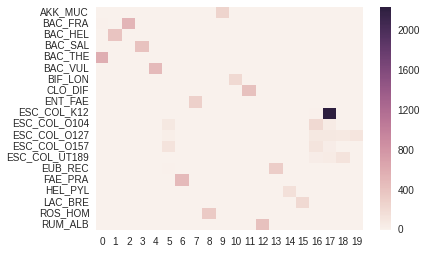

In [15]:
import pandas as pd
from sklearn import metrics
import seaborn as sns

true_clust = pd.read_csv("Strain-true_clustering.csv",index_col=0,header=None,names=["organism","ratio","ev"])
clust = pd.read_csv("./Final/Strain/Fixed/2775947931/clustering.csv",index_col=0,header=None,names=["clust_nr"])
clust_comp = true_clust.join(clust)

adj_rand = metrics.adjusted_rand_score(clust_comp["organism"],clust_comp["clust_nr"])

org = sorted(clust_comp["organism"].unique())
clust_comp["org_nr"] = clust_comp.apply(lambda row: org.index(row["organism"]),axis=1)
conf_matrix = pd.DataFrame(metrics.confusion_matrix(clust_comp["org_nr"],clust_comp["clust_nr"]))
conf_matrix.index = org
sns.heatmap(conf_matrix)


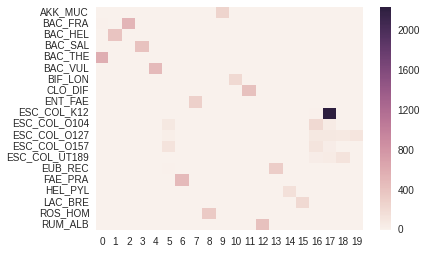

In [15]:
import pandas as pd
from sklearn import metrics
import seaborn as sns

true_clust = pd.read_csv("Strain-true_clustering.csv",index_col=0,header=None,names=["organism","ratio","ev"])
clust = pd.read_csv("./Final/Strain/Fixed/2775947931/clustering.csv",index_col=0,header=None,names=["clust_nr"])
clust_comp = true_clust.join(clust)

adj_rand = metrics.adjusted_rand_score(clust_comp["organism"],clust_comp["clust_nr"])

org = sorted(clust_comp["organism"].unique())
clust_comp["org_nr"] = clust_comp.apply(lambda row: org.index(row["organism"]),axis=1)
conf_matrix = pd.DataFrame(metrics.confusion_matrix(clust_comp["org_nr"],clust_comp["clust_nr"]))
conf_matrix.index = org
sns.heatmap(conf_matrix)


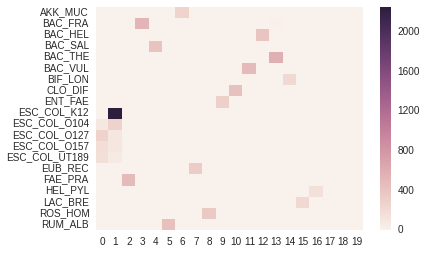

In [16]:
true_clust = pd.read_csv("Strain-true_clustering.csv",index_col=0,header=None,names=["organism","ratio","ev"])
clust = pd.read_csv("./Final/Strain/Guess/3596150651/clustering.csv",index_col=0,header=None,names=["clust_nr"])
clust_comp = true_clust.join(clust)

adj_rand = metrics.adjusted_rand_score(clust_comp["organism"],clust_comp["clust_nr"])

org = sorted(clust_comp["organism"].unique())
clust_comp["org_nr"] = clust_comp.apply(lambda row: org.index(row["organism"]),axis=1)
conf_matrix = pd.DataFrame(metrics.confusion_matrix(clust_comp["org_nr"],clust_comp["clust_nr"]))
conf_matrix.index = org
sns.heatmap(conf_matrix)

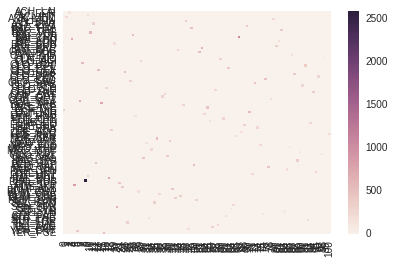

In [17]:
true_clust = pd.read_csv("Species-true_clustering.csv",index_col=0,header=None,names=["organism","ratio","ev"])
clust = pd.read_csv("./Final/Species/Fixed/2520437270/clustering.csv",index_col=0,header=None,names=["clust_nr"])
clust_comp = true_clust.join(clust)

adj_rand = metrics.adjusted_rand_score(clust_comp["organism"],clust_comp["clust_nr"])

org = sorted(clust_comp["organism"].unique())
clust_comp["org_nr"] = clust_comp.apply(lambda row: org.index(row["organism"]),axis=1)
conf_matrix = pd.DataFrame(metrics.confusion_matrix(clust_comp["org_nr"],clust_comp["clust_nr"]))
conf_matrix.index = org
sns.heatmap(conf_matrix)

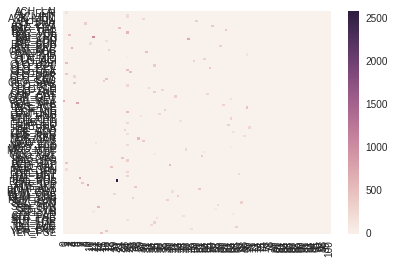

In [19]:
true_clust = pd.read_csv("Species-true_clustering.csv",index_col=0,header=None,names=["organism","ratio","ev"])
clust = pd.read_csv("./Final/Species/Guess/3340639990/clustering.csv",index_col=0,header=None,names=["clust_nr"])
clust_comp = true_clust.join(clust)

adj_rand = metrics.adjusted_rand_score(clust_comp["organism"],clust_comp["clust_nr"])

org = sorted(clust_comp["organism"].unique())
clust_comp["org_nr"] = clust_comp.apply(lambda row: org.index(row["organism"]),axis=1)
conf_matrix = pd.DataFrame(metrics.confusion_matrix(clust_comp["org_nr"],clust_comp["clust_nr"]))
conf_matrix.index = org
sns.heatmap(conf_matrix)